# Stock Price Prediction

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
%matplotlib inline

## Data Preprocessing

In [2]:
df = pd.read_excel('Tesla_Stock.xlsx')
data = df['Close'].values.reshape(-1, 1)
train_data = data[:1800]
test_data = data[1800:2274]

In [3]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(train_data)
scaled_test = scaler.transform(test_data)

In [4]:
def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

In [5]:
X_train, y_train = create_sequences(scaled_train)
X_test, y_test = create_sequences(scaled_test)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

## Building the Model

In [6]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

C:\Users\naman\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 0.0317 - val_loss: 0.0034
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0020 - val_loss: 0.0036
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0015 - val_loss: 0.0023
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0018 - val_loss: 0.0021
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0018 - val_loss: 0.0020
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0014 - val_loss: 0.0029
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0014 - val_loss: 0.0019
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0013 - val_loss: 0.0019
Epoch 9/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0012 - val_loss: 0.0018
Epoch 10/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 11/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 12/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0

## Evaluating the Model

In [8]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


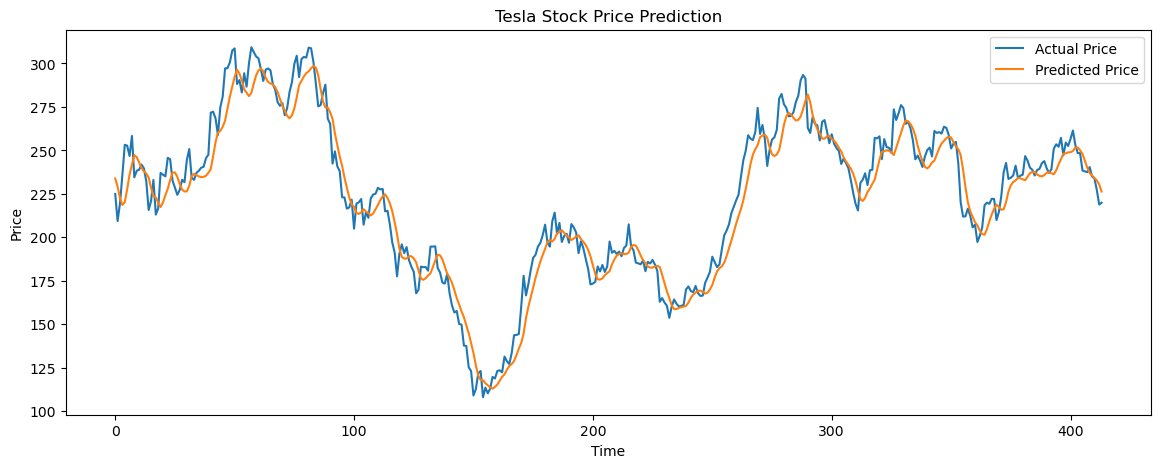

In [9]:
plt.figure(figsize=(14, 5))
plt.plot(df['Close'].values[1860:2274], label='Actual Price')
plt.plot(predictions, label='Predicted Price')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()